# Fake News Classifier

The aim of this project is to create a model able to predict if a news is fake or not, given the author, the title and the content of the news.

---

In [3]:
#install python 3.9
!sudo apt-get update -y
!sudo apt-get install python3.9

#change alternatives
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 2

#check python version
!python --version
#3.9.6

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:13 http://security.ubuntu.c

## Exploratory data analysis and data cleaning 

### Preliminaries
Preliminaries actions to set up the project:
* import libraries
* import data


#### Import librarires
Importing of all the libraries to use for the project

In [5]:
# Importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud,STOPWORDS
from bs4 import BeautifulSoup

#### Import  Data

In [6]:
# Loading the data
true = pd.read_csv('./data/True.csv')
fake = pd.read_csv('./data/Fake.csv')

In [7]:
true.head(4)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"


In [8]:
fake.head(4)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"


In [9]:
true['category'] = 1
fake['category'] = 0

In [10]:
df = pd.concat([true, fake])

In [11]:
df.shape

(44898, 5)

In [12]:
# Increasing the width of the the columns
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [13]:
df['title']

0        As U.S. budget fight looms, Republicans flip their fiscal script                     
1        U.S. military to accept transgender recruits on Monday: Pentagon                     
2        Senior U.S. Republican senator: 'Let Mr. Mueller do his job'                         
3        FBI Russia probe helped by Australian diplomat tip-off: NYT                          
4        Trump wants Postal Service to charge 'much more' for Amazon shipments                
                                         ...                                                  
23476    McPain: John McCain Furious That Iran Treated US Sailors Well                        
23477    JUSTICE? Yahoo Settles E-mail Privacy Class-action: $4M for Lawyers, $0 for Users    
23478    Sunnistan: US and Allied ‘Safe Zone’ Plan to Take Territorial Booty in Northern Syria
23479    How to Blow $700 Million: Al Jazeera America Finally Calls it Quits                  
23480    10 U.S. Navy Sailors Held by Iranian Mili

In [14]:
df['text']

0        WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that suppor

In [15]:
df['category'].value_counts()

0    23481
1    21417
Name: category, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


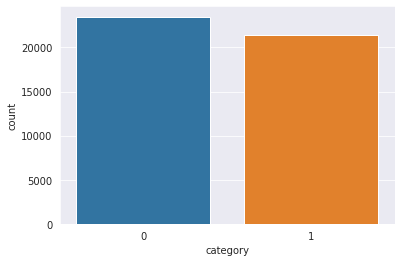

In [16]:
sns.set_style("darkgrid")
sns.countplot(df.category)

In [17]:
df.isnull().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [18]:
df=df.dropna()

In [19]:
df.isnull().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [20]:
df.reset_index(inplace=True)

In [21]:
df.head()

index  \
0  0       
1  1       
2  2       
3  3       
4  4       

                                                                   title  \
0  As U.S. budget fight looms, Republicans flip their fiscal script        
1  U.S. military to accept transgender recruits on Monday: Pentagon        
2  Senior U.S. Republican senator: 'Let Mr. Mueller do his job'            
3  FBI Russia probe helped by Australian diplomat tip-off: NYT             
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

### Text cleaning

In [22]:
# Merging all text in 1 column
df['text'] = df['text'] + " " + df['title']
del df['title']
del df['subject']
del df['date']

##### Stopwords

In [23]:
import string
import re 

In [24]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
def text_cleaning(text):
  # Remove urls
  text = BeautifulSoup(text, "html.parser").get_text()  
  text = re.sub('\[[^]]*\]', '', text)
  text = re.sub(r'http\S+', '', text)
  text = remove_stopwords(text)
  # .lower() - convert all strings to lowercase
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text.lower())     
  # Remove all non-ascii characters
  text = re.sub(r'[^\x00-\x7f]', r' ', text)
  return text


df['text']=df['text'].apply(text_cleaning) 

In [26]:
df['text']

0        washington  reuters  head conservative republican faction u s  congress  voted month huge expansion national debt pay tax cuts  called  fiscal conservative  sunday urged budget restraint 2018  keeping sharp pivot way among republicans  u s  representative mark meadows  speaking cbs   face nation   drew hard line federal spending  lawmakers bracing battle january  return holidays wednesday  lawmakers begin trying pass federal budget fight likely linked issues  immigration policy  even november congressional election campaigns approach republicans seek keep control congress  president donald trump republicans want big budget increase military spending  democrats also want proportional increases non defense  discretionary  spending programs support education  scientific research  infrastructure  public health environmental protection   the  trump  administration already willing say   we re going increase non defense discretionary spending     7 percent    meadows  chairman small 

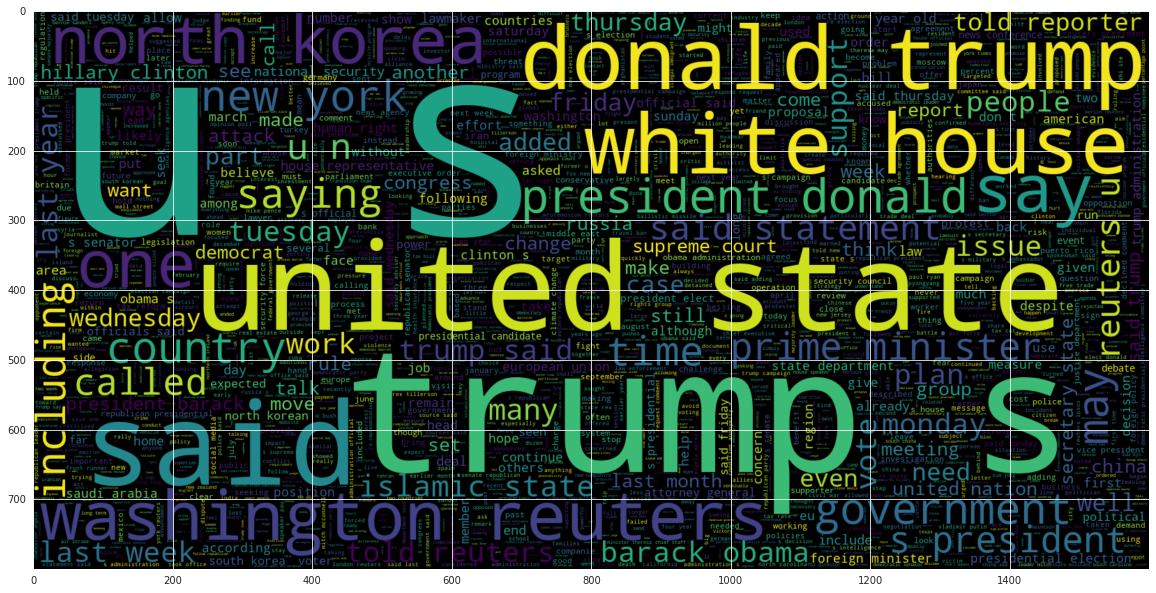

In [27]:
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.category == 1].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.savefig("wordcloud_not_fakes.png")

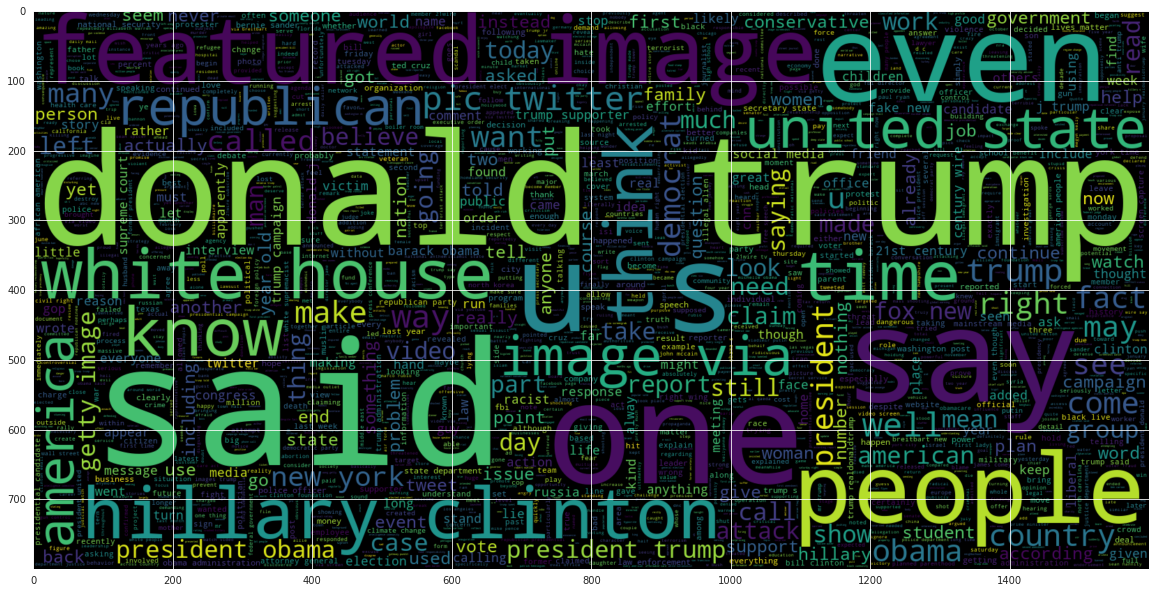

In [28]:
# Not Fake
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.category == 0].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.savefig("wordcloud_fakes.png")

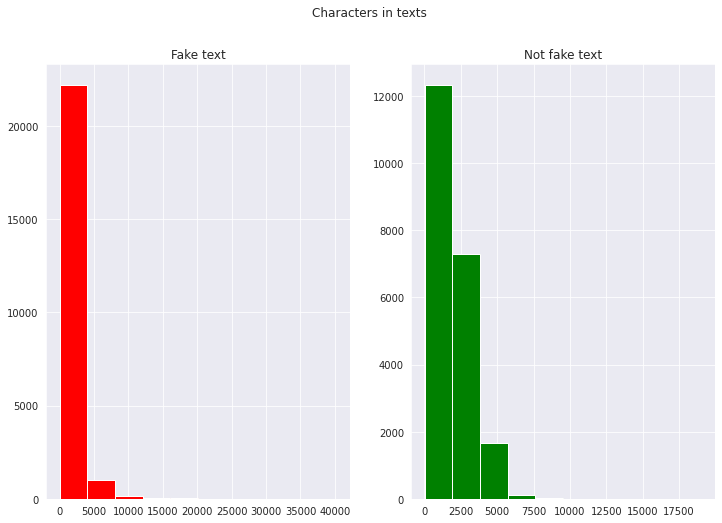

In [29]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['category']==0]['text'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Fake text')
text_len=df[df['category']==1]['text'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Not fake text')
fig.suptitle('Characters in texts')
plt.savefig("characters.png")
plt.show()

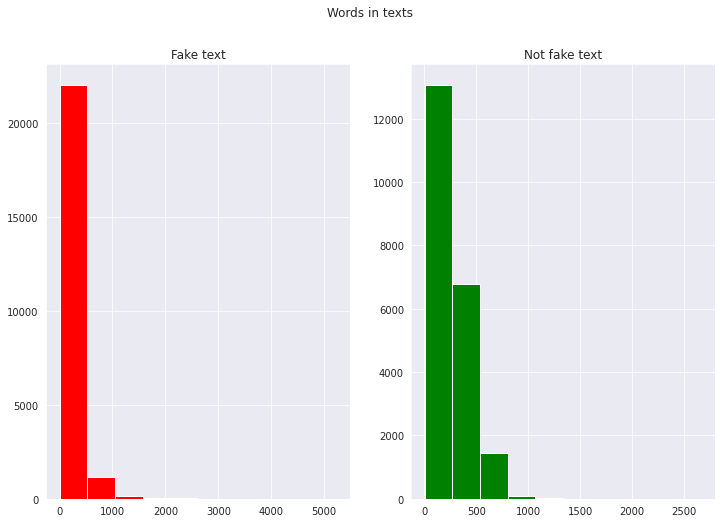

In [30]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['category']==0]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Fake text')
text_len=df[df['category']==1]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Not fake text')
fig.suptitle('Words in texts')
plt.savefig("words.png")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each text')

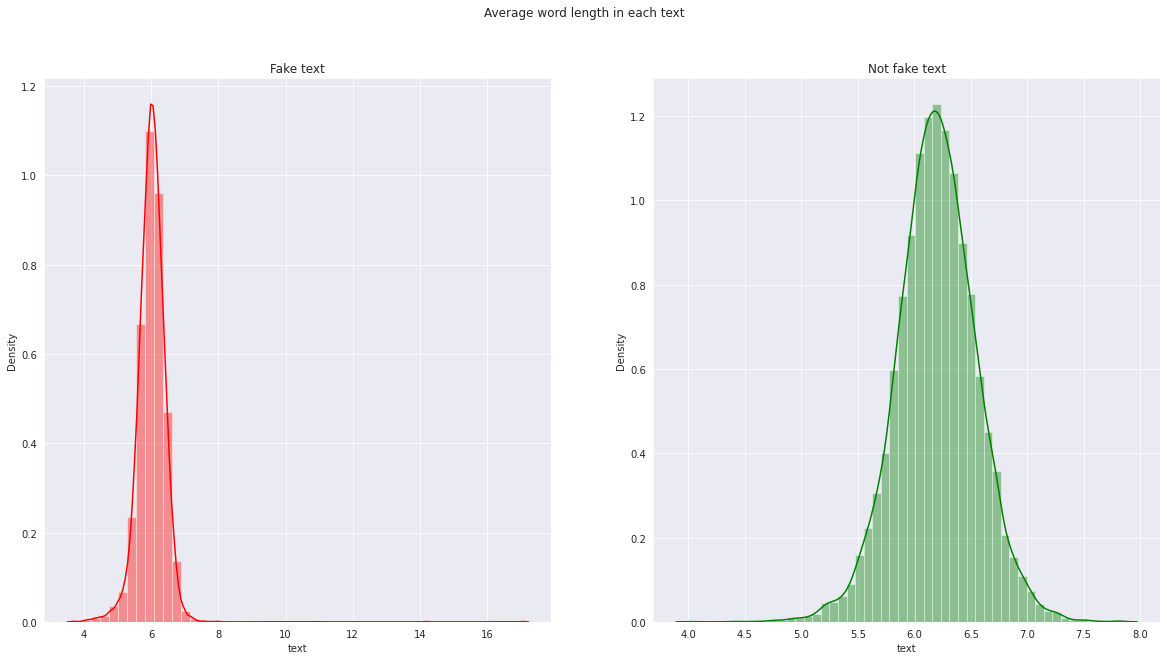

In [31]:
import numpy as np
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df[df['category']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Fake text')
word=df[df['category']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Not fake text')
plt.savefig("length.png")
fig.suptitle('Average word length in each text')

####  Stemming the text

In [32]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
df["text"] = df["text"].apply(stemmer.stem)

## Splitting the dataframe

In [33]:
y = df['category']
X = df['text']

In [34]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: category, dtype: int64

## Making train and test data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

---
## Machine learning model training

### Naive Bayes model

#### TF-Idf vectorized 

In [45]:
from sklearn.naive_bayes import MultinomialNB

In [46]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate

import joblib

In [ ]:
clf_NB = MultinomialNB() 

nb_tfidf_model = Pipeline([
    ('Preprocessors', TfidfVectorizer(stop_words = 'english',max_df=0.7)),
    ('Model', clf_NB)
])

set_config(display='diagram')
display(nb_tfidf_model)

Pipeline(steps=[('Preprocessors',
                 TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('Model', MultinomialNB())])

In [ ]:
# Look at parameters
nb_tfidf_model.get_params()

{'memory': None,
 'steps': [('Preprocessors',
   TfidfVectorizer(max_df=0.7, stop_words='english')),
  ('Model', MultinomialNB())],
 'verbose': False,
 'Preprocessors': TfidfVectorizer(max_df=0.7, stop_words='english'),
 'Model': MultinomialNB(),
 'Preprocessors__analyzer': 'word',
 'Preprocessors__binary': False,
 'Preprocessors__decode_error': 'strict',
 'Preprocessors__dtype': numpy.float64,
 'Preprocessors__encoding': 'utf-8',
 'Preprocessors__input': 'content',
 'Preprocessors__lowercase': True,
 'Preprocessors__max_df': 0.7,
 'Preprocessors__max_features': None,
 'Preprocessors__min_df': 1,
 'Preprocessors__ngram_range': (1, 1),
 'Preprocessors__norm': 'l2',
 'Preprocessors__preprocessor': None,
 'Preprocessors__smooth_idf': True,
 'Preprocessors__stop_words': 'english',
 'Preprocessors__strip_accents': None,
 'Preprocessors__sublinear_tf': False,
 'Preprocessors__token_pattern': '(?u)\\b\\w\\w+\\b',
 'Preprocessors__tokenizer': None,
 'Preprocessors__use_idf': True,
 'Preprocess

In [ ]:

grid_params = {
    'Model__alpha': [0, 0.0001, 0.001],
}
# Instantiate the grid search model
grid_search_nb_tfidf_model = GridSearchCV(
    estimator=nb_tfidf_model,
    param_grid= grid_params,
    cv=5, 
    n_jobs=-1
)

grid_search_nb_tfidf_model.fit(X_train, y_train)
grid_search_nb_tfidf_model.best_params_

{'Model__alpha': 0.001}

In [ ]:
grid_search_nb_tfidf_model.best_score_

0.9445125322192618

#### Count Vectorized

In [43]:
clf_NB = MultinomialNB() 

nb_count_model = Pipeline([
    ('Preprocessors', CountVectorizer(stop_words = 'english',max_df=0.7)),
    ('Model', clf_NB)
])

set_config(display='diagram')
display(nb_count_model)

Pipeline(steps=[('Preprocessors',
                 CountVectorizer(max_df=0.7, stop_words='english')),
                ('Model', MultinomialNB())])

In [48]:
grid_params = {
    'Model__alpha': [0, 0.0001, 0.001],
}
# Instantiate the grid search model
grid_search_nb_count_model = GridSearchCV(
    estimator=nb_count_model,
    param_grid= grid_params,
    cv=5, 
    n_jobs=None
)

grid_search_nb_count_model.fit(X_train, y_train)
grid_search_nb_count_model.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


{'Model__alpha': 0.0001}

In [49]:
grid_search_nb_count_model.best_score_

0.9520574167167158

In [50]:
model = grid_search_nb_count_model.best_estimator_
joblib.dump(model, "nb_model.pkl") 

['nb_model.pkl']

In [54]:
joblib.__version__

'1.2.0'

In [61]:
pred = grid_search_nb_count_model.predict(X_test)                     
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
print(cm)

accuracy:   0.956
[[4490  160]
 [ 235 4095]]


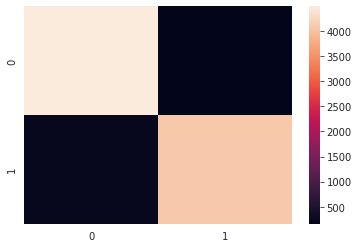

In [62]:
sns.heatmap(cm)